In [37]:
pip install pandas numpy matplotlib seaborn scikit-learn

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
df=pd.read_csv('/content/drive/MyDrive/synthetic_retail_data.csv')

Dataset examination and summary

In [41]:
print(df.head())
print(df.info())
print(df.describe())

   InvoiceNo CustomerID      Date ProductCategory  Quantity  UnitPrice  \
0  INV105646   CUST1810  1/1/2023            Home         7      67.88   
1  INV105099   CUST1530  1/1/2023            Toys         6      24.22   
2  INV102818   CUST1701  1/1/2023     Electronics         6     158.78   
3  INV107351   CUST1323  1/1/2023     Electronics         5     102.23   
4  INV108415   CUST1406  1/1/2023     Electronics         8      62.32   

   DiscountApplied  ReviewRating  IsFirstPurchase MarketingChannel  ...  \
0             44.6           4.0                0          Organic  ...   
1              0.0           2.0                1           Social  ...   
2             25.9           5.0                1            Email  ...   
3             39.0           3.0                1           Social  ...   
4             26.7           4.0                0            Email  ...   

  ItemsInCart  PreviousSpending  BrowsingSessions  TotalAmount  Unnamed: 17  \
0           7            

In [42]:
print(df.isnull().sum())

InvoiceNo              0
CustomerID             0
Date                   0
ProductCategory        0
Quantity               0
UnitPrice              0
DiscountApplied        0
ReviewRating        1665
IsFirstPurchase        0
MarketingChannel     472
Country                0
TimeOnSite           475
ShippingCost           0
ItemsInCart            0
PreviousSpending       0
BrowsingSessions       0
TotalAmount            0
Unnamed: 17         9500
Unnamed: 18         8271
Unnamed: 19         9500
Unnamed: 20         8271
Unnamed: 21         8271
Unnamed: 22         8271
dtype: int64


In [43]:
columns_to_drop = ['Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22']
df_cleaned = df.drop(columns=columns_to_drop)
print(df_cleaned.isnull().sum())

InvoiceNo              0
CustomerID             0
Date                   0
ProductCategory        0
Quantity               0
UnitPrice              0
DiscountApplied        0
ReviewRating        1665
IsFirstPurchase        0
MarketingChannel     472
Country                0
TimeOnSite           475
ShippingCost           0
ItemsInCart            0
PreviousSpending       0
BrowsingSessions       0
TotalAmount            0
dtype: int64


Data Cleaning: Handling Missing Values

In [44]:
# Impute missing values in 'ReviewRating' with the median
df_cleaned['ReviewRating'] = df_cleaned['ReviewRating'].fillna(df_cleaned['ReviewRating'].median())

# Impute missing values in 'TimeOnSite' with the median
df_cleaned['TimeOnSite'] = df_cleaned['TimeOnSite'].fillna(df_cleaned['TimeOnSite'].median())

# Impute missing values in 'MarketingChannel' with the mode
df_cleaned['MarketingChannel'] = df_cleaned['MarketingChannel'].fillna(df_cleaned['MarketingChannel'].mode()[0])

print(df_cleaned.isnull().sum())

InvoiceNo           0
CustomerID          0
Date                0
ProductCategory     0
Quantity            0
UnitPrice           0
DiscountApplied     0
ReviewRating        0
IsFirstPurchase     0
MarketingChannel    0
Country             0
TimeOnSite          0
ShippingCost        0
ItemsInCart         0
PreviousSpending    0
BrowsingSessions    0
TotalAmount         0
dtype: int64


In [45]:
review_rating_count = df_cleaned['ReviewRating'].value_counts(dropna=False)
print("\nMissing values in 'ReviewRating' column:")
print(review_rating_count)


Missing values in 'ReviewRating' column:
ReviewRating
4.0    4713
3.0    2205
5.0    1245
2.0     907
1.0     430
Name: count, dtype: int64


Detection of outliers

In [46]:
# Identify columns with apparent outliers based on the boxplots
outlier_cols = ['Quantity', 'UnitPrice', 'DiscountApplied', 'TimeOnSite', 'ShippingCost', 'PreviousSpending', 'TotalAmount']

# Remove outliers using the IQR method
for col in outlier_cols:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]

print(df_cleaned.describe())
display(df_cleaned.head())

          Quantity    UnitPrice  DiscountApplied  ReviewRating  \
count  8145.000000  8145.000000      8145.000000   8145.000000   
mean      8.284592    47.160106        17.516636      3.567465   
std       3.174414    24.471240        18.243836      0.986847   
min       1.000000    10.060000         0.000000      1.000000   
25%       6.000000    29.890000         0.000000      3.000000   
50%       8.000000    39.640000        12.600000      4.000000   
75%      10.000000    57.490000        33.400000      4.000000   
max      18.000000   132.350000        55.000000      5.000000   

       IsFirstPurchase   TimeOnSite  ShippingCost  ItemsInCart  \
count      8145.000000  8145.000000   8145.000000  8145.000000   
mean          0.315163   288.295998      9.964836     9.284101   
std           0.464609   110.786589      4.783214     3.332407   
min           0.000000    30.000000      0.000000     1.000000   
25%           0.000000   214.400000      6.600000     7.000000   
50%      

,InvoiceNo,CustomerID,Date,ProductCategory,Quantity,UnitPrice,DiscountApplied,ReviewRating,IsFirstPurchase,MarketingChannel,Country,TimeOnSite,ShippingCost,ItemsInCart,PreviousSpending,BrowsingSessions,TotalAmount
0,INV105646,CUST1810,1/1/2023,Home,7,67.88,44.6,4.0,0,Organic,USA,273.8,6.84,7,186.55,3,270.08
1,INV105099,CUST1530,1/1/2023,Toys,6,24.22,0.0,2.0,1,Social,USA,401.0,9.84,8,0.00,3,155.16
3,INV107351,CUST1323,1/1/2023,Electronics,5,102.23,39.0,3.0,1,Social,Australia,381.3,12.39,6,0.00,5,324.19
4,INV108415,CUST1406,1/1/2023,Electronics,8,62.32,26.7,4.0,0,Email,UK,206.5,21.62,8,371.94,4,387.06
5,INV108351,CUST1080,1/1/2023,Toys,10,23.47,0.0,3.0,0,Organic,USA,523.1,8.84,12,260.71,1,243.54


Descriptive statistics and EDA

In [47]:
# Likelihood of a 5-star review
five_star_review_prob = (df_cleaned['ReviewRating'] == 5).mean()
print(f"Likelihood of a 5-star review: {five_star_review_prob:.4f}")

# Probability of an order value > $1,000
order_value_1000_prob = (df_cleaned['TotalAmount'] > 1000).mean()
print(f"Probability of an order value > $1,000: {order_value_1000_prob:.4f}")

Likelihood of a 5-star review: 0.1303
Probability of an order value > $1,000: 0.0000


Two-sample t-test

In [48]:
from scipy.stats import ttest_ind

# Split the data into two groups based on 'IsFirstPurchase'
first_purchase_total_amount = df_cleaned[df_cleaned['IsFirstPurchase'] == 1]['TotalAmount']
repeat_purchase_total_amount = df_cleaned[df_cleaned['IsFirstPurchase'] == 0]['TotalAmount']

# Perform independent samples t-test
t_statistic, p_value = ttest_ind(first_purchase_total_amount, repeat_purchase_total_amount)

# Print the results
print(f"T-statistic: {t_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("\nInterpretation: The difference in mean total amount between first-time and repeat customers is statistically significant.")
else:
    print("\nInterpretation: There is no statistically significant difference in the mean total amount between first-time and repeat customers.")

T-statistic: -25.3307
P-value: 0.0000

Interpretation: The difference in mean total amount between first-time and repeat customers is statistically significant.


ANOVA
Prepare the data for ANOVA, grouping 'TotalAmount' by 'Country'. Perform the one-way ANOVA test and interpret the results
ACTIVITY
Prepare the data for ANOVA by grouping 'TotalAmount' by 'Country' and perform the one-way ANOVA test.

In [49]:
from scipy.stats import f_oneway

# Create a list of TotalAmount values for each unique country
country_groups = [df_cleaned[df_cleaned['Country'] == country]['TotalAmount'] for country in df_cleaned['Country'].unique()]

# Perform one-way ANOVA test
f_statistic, p_value = f_oneway(*country_groups)

# Print the results
print(f"F-statistic: {f_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("\nInterpretation: There is a statistically significant difference in the mean total amount across different countries.")
else:
    print("\nInterpretation: There is no statistically significant difference in the mean total amount across different countries.")

F-statistic: 0.6685
P-value: 0.6473

Interpretation: There is no statistically significant difference in the mean total amount across different countries.


Chi-square test

In [54]:
# @title
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df_cleaned['MarketingChannel'], df_cleaned['ReviewRating'])
print("Contingency Table:")
display(contingency_table)

# Perform the Chi-square test for independence
chi2_statistic, p_value, degrees_of_freedom, expected_frequencies = chi2_contingency(contingency_table)

# Print the results
print(f"\nChi-square Statistic: {chi2_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("\nInterpretation: There is a statistically significant association between MarketingChannel and ReviewRating.")
else:
    print("\nInterpretation: There is no statistically significant association between MarketingChannel and ReviewRating.")

Contingency Table:


ReviewRating,1.0,2.0,3.0,4.0,5.0
MarketingChannel,,,,,
Ads,66,128,309,648,175
Email,136,262,649,1368,377
Organic,86,186,451,1005,265
Referral,50,125,289,598,146
Social,36,82,198,412,98



Chi-square Statistic: 6.6257
P-value: 0.9798

Interpretation: There is no statistically significant association between MarketingChannel and ReviewRating.


Confidence interval constructio

In [57]:
from scipy import stats
# 1. Calculate the average daily revenue
daily_revenue = df_cleaned.groupby('Date')['TotalAmount'].sum()

# 2. Calculate the overall mean of the average daily revenue
mean_daily_revenue = daily_revenue.mean()

# 3. Calculate the standard error of the mean for the average daily revenue
se_daily_revenue = stats.sem(daily_revenue)

# 4. Determine the critical value for a 95% confidence interval
# Using t-distribution as sample size (number of days) might not be very large
alpha = 0.05
degrees_freedom = len(daily_revenue) - 1
critical_value_revenue = stats.t.ppf(1 - alpha/2, degrees_freedom)

# 5. Calculate the margin of error for the average daily revenue
margin_of_error_revenue = critical_value_revenue * se_daily_revenue

# 6. Construct the 95% confidence interval for the average daily revenue
conf_interval_revenue = (mean_daily_revenue - margin_of_error_revenue, mean_daily_revenue + margin_of_error_revenue)

# 7. Calculate the overall mean of the 'ReviewRating' column
mean_review_rating = df_cleaned['ReviewRating'].mean()

# 8. Calculate the standard error of the mean for the 'ReviewRating'
se_review_rating = stats.sem(df_cleaned['ReviewRating'])

# 9. Determine the critical value for a 95% confidence interval for the 'ReviewRating'
degrees_freedom_rating = len(df_cleaned['ReviewRating']) - 1
critical_value_rating = stats.t.ppf(1 - alpha/2, degrees_freedom_rating)

# 10. Calculate the margin of error for the 'ReviewRating'
margin_of_error_rating = critical_value_rating * se_review_rating

# 11. Construct the 95% confidence interval for the average customer review rating
conf_interval_rating = (mean_review_rating - margin_of_error_rating, mean_review_rating + margin_of_error_rating)

# 12. Print the calculated confidence intervals
print(f"95% Confidence Interval for Average Daily Revenue\n: {conf_interval_revenue}\n")
print(f"95% Confidence Interval for Average Customer Review Rating\n: {conf_interval_rating}\n")

95% Confidence Interval for Average Daily Revenue
: (np.float64(6700.864190917537), np.float64(7315.792357027671))

95% Confidence Interval for Average Customer Review Rating
: (np.float64(3.546030019209867), np.float64(3.588899385332797))



Correlation and regression analysis

In [58]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# Select numerical columns
numerical_cols = df_cleaned.select_dtypes(include=np.number)

# Calculate the correlation matrix
correlation_matrix = numerical_cols.corr()
print("Correlation Matrix:")
display(correlation_matrix)

# Select dependent and independent variables
dependent_variable = 'TotalAmount'
independent_variables = ['Quantity', 'UnitPrice', 'DiscountApplied', 'ReviewRating', 'TimeOnSite', 'ShippingCost', 'ItemsInCart', 'PreviousSpending', 'BrowsingSessions']

X = df_cleaned[independent_variables]
y = df_cleaned[dependent_variable]

# Add a constant to the independent variables for statsmodels
X = sm.add_constant(X)

# Build and fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print("\nLinear Regression Model Summary:")
print(model.summary())

Correlation Matrix:


,Quantity,UnitPrice,DiscountApplied,ReviewRating,IsFirstPurchase,TimeOnSite,ShippingCost,ItemsInCart,PreviousSpending,BrowsingSessions,TotalAmount
Quantity,1.000000,-0.079836,0.017778,0.010568,-0.494581,0.575025,-0.001051,0.951534,0.572666,-0.014473,0.560078
UnitPrice,-0.079836,1.000000,0.330796,-0.019196,0.051134,-0.008259,0.002942,-0.073841,-0.066346,0.039781,0.628007
DiscountApplied,0.017778,0.330796,1.000000,0.004740,-0.007184,-0.006071,-0.027850,0.021414,0.021292,0.005225,-0.101936
ReviewRating,0.010568,-0.019196,0.004740,1.000000,0.008387,0.008534,0.001641,0.008023,0.004732,-0.009343,-0.005051
IsFirstPurchase,-0.494581,0.051134,-0.007184,0.008387,1.000000,0.012702,0.001411,-0.474760,-0.855637,0.000310,-0.270262
TimeOnSite,0.575025,-0.008259,-0.006071,0.008534,0.012702,1.000000,0.003921,0.546275,-0.018409,-0.009539,0.368740
ShippingCost,-0.001051,0.002942,-0.027850,0.001641,0.001411,0.003921,1.000000,-0.002462,0.001211,0.000242,0.037560
ItemsInCart,0.951534,-0.073841,0.021414,0.008023,-0.474760,0.546275,-0.002462,1.000000,0.550296,-0.014140,0.530623
PreviousSpending,0.572666,-0.066346,0.021292,0.004732,-0.855637,-0.018409,0.001211,0.550296,1.000000,-0.007429,0.295167
BrowsingSessions,-0.014473,0.039781,0.005225,-0.009343,0.000310,-0.009539,0.000242,-0.014140,-0.007429,1.000000,0.030462



Linear Regression Model Summary:
                            OLS Regression Results                            
Dep. Variable:            TotalAmount   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     7939.
Date:                Fri, 10 Oct 2025   Prob (F-statistic):               0.00
Time:                        19:12:21   Log-Likelihood:                -44299.
No. Observations:                8145   AIC:                         8.862e+04
Df Residuals:                    8135   BIC:                         8.869e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const 

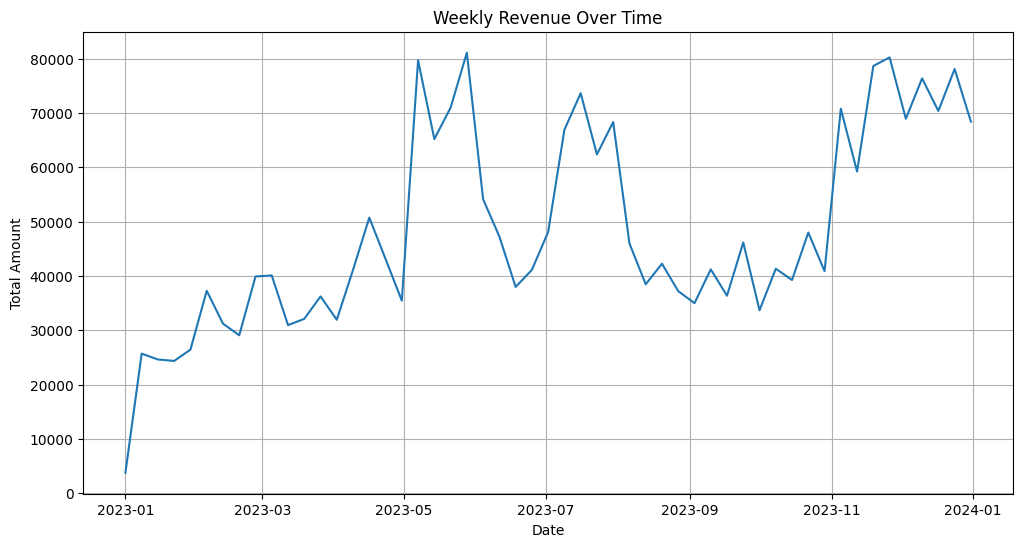

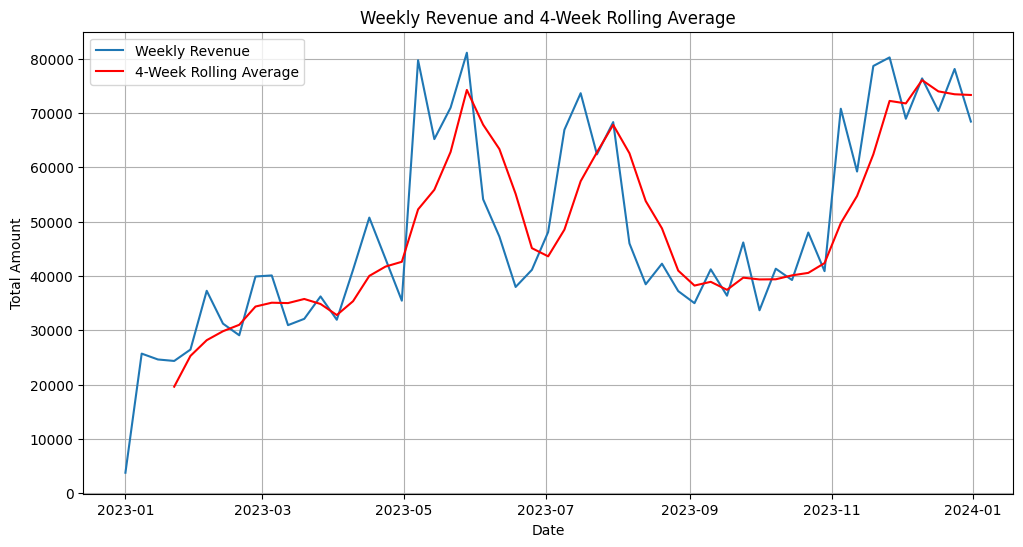

Interpretation of Weekly Revenue Plot and Rolling Average:
The plot shows the weekly revenue over the year. The rolling average helps to smooth out short-term fluctuations and highlight the underlying trend.
Observing the plot, there appears to be an increasing trend in revenue over the year.
There also seems to be some seasonality, with potential peaks and troughs occurring at similar times each year, although with only one full year of data, it's hard to confirm strong seasonality.
The rolling average confirms the upward trend, showing a consistent increase in the smoothed revenue line.


In [59]:
# Group by date and sum TotalAmount for daily revenue
daily_revenue = df_cleaned.groupby('Date')['TotalAmount'].sum()

# Ensure the index is a DatetimeIndex
daily_revenue.index = pd.to_datetime(daily_revenue.index)

# Resample to weekly frequency
weekly_revenue = daily_revenue.resample('W').sum()

# Plot the resampled time series
plt.figure(figsize=(12, 6))
plt.plot(weekly_revenue)
plt.title('Weekly Revenue Over Time')
plt.xlabel('Date')
plt.ylabel('Total Amount')
plt.grid(True)
plt.show()
# Apply a rolling average (e.g., 4-week rolling average)
rolling_avg = weekly_revenue.rolling(window=4).mean()

# Plot the original weekly revenue and the rolling average
plt.figure(figsize=(12, 6))
plt.plot(weekly_revenue, label='Weekly Revenue')
plt.plot(rolling_avg, label='4-Week Rolling Average', color='red')
plt.title('Weekly Revenue and 4-Week Rolling Average')
plt.xlabel('Date')
plt.ylabel('Total Amount')
plt.legend()
plt.grid(True)
plt.show()

# Interpretation of the plot and rolling average
print("Interpretation of Weekly Revenue Plot and Rolling Average:")
print("The plot shows the weekly revenue over the year. The rolling average helps to smooth out short-term fluctuations and highlight the underlying trend.")
print("Observing the plot, there appears to be an increasing trend in revenue over the year.")
print("There also seems to be some seasonality, with potential peaks and troughs occurring at similar times each year, although with only one full year of data, it's hard to confirm strong seasonality.")
print("The rolling average confirms the upward trend, showing a consistent increase in the smoothed revenue line.")